In [ ]:
# KMeans clustering

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb

In [90]:
import warnings as wn
wn.filterwarnings("ignore")

In [91]:
dt=pd.read_csv("clustering.csv")

In [92]:
dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


For this article, we will be taking only two variables from the data – “LoanAmount” and “ApplicantIncome.” This will make it easy to visualize the steps as well. Let’s pick these two variables and visualize the data points:

In [93]:
X_input=dt[["ApplicantIncome","LoanAmount"]]

In [94]:
# vsulize the plots

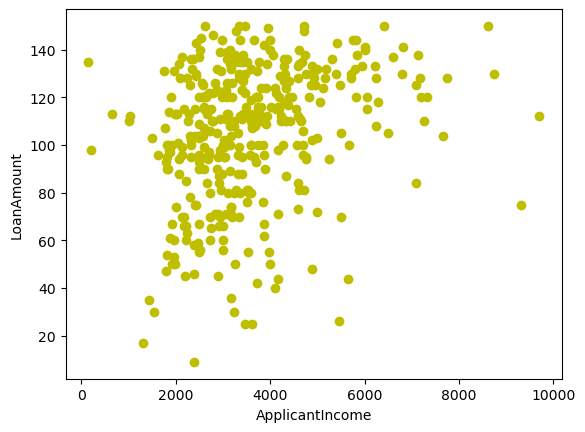

In [95]:
plt.scatter(X_input["ApplicantIncome"],X_input["LoanAmount"],c="y")
plt.xlabel("ApplicantIncome")
plt.ylabel("LoanAmount")
plt.show()

Steps 1 and 2 of K-Means were about choosing the number of clusters (k) and selecting random centroids for each cluster. We will pick 3 clusters and then select random observations from the data as the centroids:



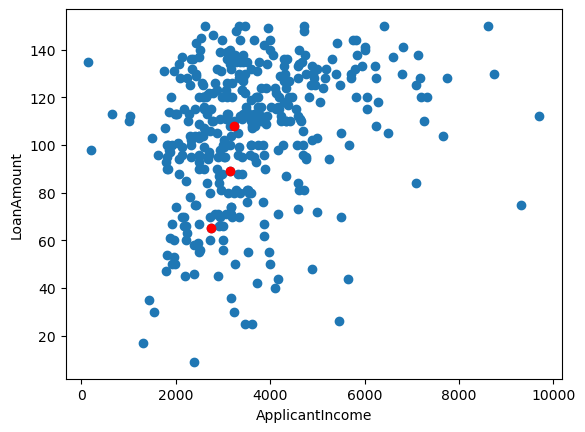

In [96]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids=(X_input.sample(n=K))
plt.scatter(X_input["ApplicantIncome"],X_input["LoanAmount"])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c="r")
plt.xlabel("ApplicantIncome")
plt.ylabel("LoanAmount")
plt.show()

Here, the red dots represent the 3 centroids for each cluster. Note that we have chosen these points randomly, and hence every time you run this code, you might get different centroids.



In [97]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4


diff=1
j=0

while(diff!=0):
    XD=X_input
    i=1
    
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            
            ED.append(d)
        X_input[i]=ED
        i=i+1
        
    C=[]
    for index,row in X_input.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist=row[i+1]
                pos=1+1
        C.append(pos)
    X_input["Cluster"]=C
    Centroids_new=X_input.groupby(["Cluster"]).mean()[["ApplicantIncome","LoanAmount"]]
    if j== 0:
        diff=1
        j= j+1
    else:
        diff=(Centroids_new["LoanAmount"]-Centroids["LoanAmount"]).sum()+(Centroids_new["ApplicantIncome"]-Centroids["ApplicantIncome"]).sum()
        print(diff.sum())
    Centroids=X_input.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

633.3883061365405
280.3821055188752
192.12688801901947
78.3416482061933
15.695981556435925
0.0


These values might vary every time we run this. Here, we are stopping the training when the centroids are not changing after two iterations. This is the most common convergence criteria used for the K-Means clustering. We have initially defined the diff as 1, and inside the whole loop, we are calculating this diff as the difference between the centroids in the previous iteration and the current iteration.

When this difference is 0, we stop the training. Let’s now visualize the clusters we have got:



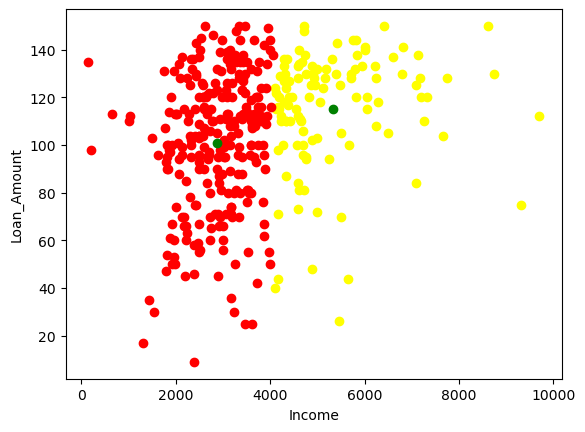

In [98]:
colour=["yellow","red","black"]

for k in range(K):
    data=X_input[X_input["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=colour[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c="green")
plt.xlabel("Income")
plt.ylabel("Loan_Amount")
plt.show()

In [114]:
# K-Means clustring  using SK Learn

#What is K-Means clustering method in Python?

K-Means clustering is a method in Python for grouping a set of data points into distinct clusters. The goal is to partition the data in such a way that points in the same cluster are more similar to each other than to points in other clusters. Here’s a breakdown of how to use K Means clustering in Python:

How K Means Clustering in Python Works?
Here is Step-by-Step Explanation that How K-means Clustering in Python works:

Initialize Centroids:

Randomly choose K data points from the dataset to be the initial centroids. K is the number of clusters you want to create.
Assign Data Points to Nearest Centroid:

For each data point in the dataset, calculate the distance to each centroid.
Assign the data point to the cluster whose centroid is the closest (usually using Euclidean distance).
Update Centroids:

Recalculate the centroids of the clusters by taking the mean of all the data points assigned to each cluster.
Repeat:

Repeat steps 2 and 3 until convergence. Convergence occurs when the centroids no longer change significantly or after a predefined number of iterations.
Final Result:

The algorithm converges, and each data point is assigned to one of the K clusters.
Here’s a simple example using Python with the popular machine learning library, scikit-learn:

In [115]:
# importing requird labraries 

from sklearn.cluster import KMeans

Prepare Your Data:

Organize your data into a format that the algorithm can understand. In many cases, you’ll have a 2D array or a pandas DataFrame.

In [116]:
import numpy as np
data = np.array([[1, 2], [5, 8], [1.5, 1.8], [8, 8], [1, 0.6], [9, 11]])

Choose the Number of Clusters (K):

Decide on the number of clusters you want the algorithm to find. This is often based on your understanding of the data or through techniques like the elbow method.


In [117]:
kmeans = KMeans(n_clusters=2)

Fit the Model:

Train the K-Means model on your data.


In [118]:
kmeans.fit(data)

KMeans(n_clusters=2)

Get Results:

Once the model is trained, you can get information about the clusters.


In [119]:
# Get the cluster centers
centroids = kmeans.cluster_centers_

# Get the labels (cluster assignments for each data point)
labels = kmeans.labels_


In [120]:
print(centroids)

[[7.33333333 9.        ]
 [1.16666667 1.46666667]]


In [121]:
print(labels)

[1 0 1 0 1 0]


In this example, n_clusters=2 indicates that we want the algorithm to find two clusters. The fit method trains the model, and then you can access information about the clusters, such as the cluster centers and labels. Visualizing the results can be helpful to see how well the algorithm grouped your data points.

Elbow Method
Here are the steps to follow in order to find the optimal number of clusters using the elbow method:

Step 1: Execute the K-means clustering on a given dataset for different K values (ranging from 1-10).

Step 2: For each value of K, calculate the WCSS value.

Step 3: Plot a graph/curve between WCSS values and the respective number of clusters K.

Step 4: The sharp point of bend or a point (looking like an elbow joint) of the plot, like an arm, will be considered as the best/optimal value of K.



In [139]:
# creating data set using pandas

dt=pd.DataFrame({
    "Country":np.random.choice(["USA","Canda","germeny","France","UK","Australia"],5),
    "latitude":np.random.uniform(40,45,5),
    "longitude":np.random.uniform(-100,150,5),
    "Language":np.random.choice(["English","French"])
})

dt

,Country,latitude,longitude,Language
0,Canda,43.072637,98.367216,English
1,USA,43.533192,131.224049,English
2,germeny,40.189816,28.263860,English
3,germeny,43.333922,37.275072,English
4,UK,42.539637,-88.640811,English


   Country   latitude   longitude Language
0    Canda  43.072637   98.367216  English
1      USA  43.533192  131.224049  English
2  germeny  40.189816   28.263860  English
3  germeny  43.333922   37.275072  English
4       UK  42.539637  -88.640811  English


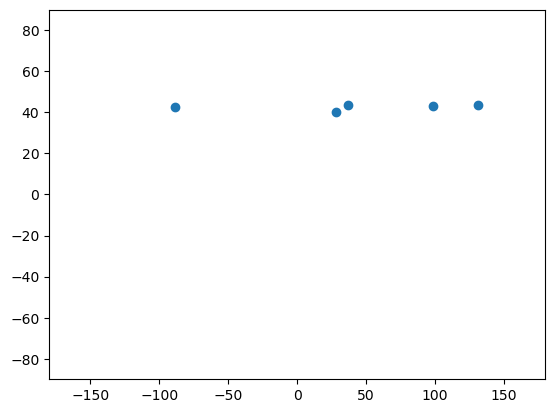

In [141]:
import pandas as pd
import matplotlib.pyplot as plt


print(dt.head())

plt.scatter(dt['longitude'],dt['latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [143]:
# Selecting the feature

x = dt.iloc[:,1:3] # 1t for rows and second for columns

x

,latitude,longitude
0,43.072637,98.367216
1,43.533192,131.224049
2,40.189816,28.263860
3,43.333922,37.275072
4,42.539637,-88.640811


In [146]:
# Clustering

kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [147]:
# Clustering results

identified_clusters = kmeans.fit_predict(x)
identified_clusters


array([0, 0, 2, 2, 1])

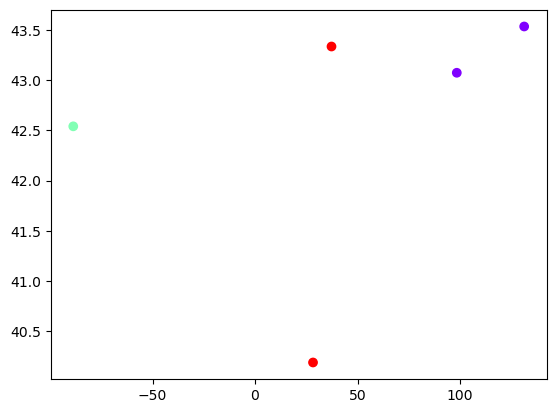

In [152]:
data_with_clusters = dt.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['longitude'],data_with_clusters['latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')

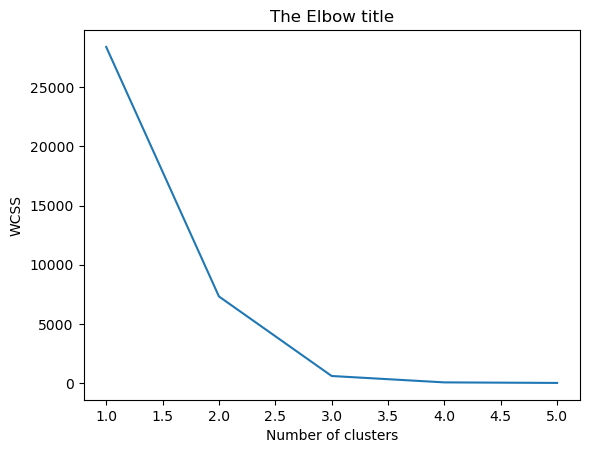

In [157]:
# WCSS and Elbow Method


wcss=[]
for i in range(1,6):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,6)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

This method shows that 3 is a good number of clusters.

Conclusion


To summarize everything that has been stated so far, k means clustering in python is a widely used unsupervised machine learning technique that enables the grouping of data into clusters based on similarity. It is a simple algorithm that can be applied to various domains and data types, including image and text data. k-means can be used for a variety of purposes. We can use it to perform dimensionality reduction also, where each transformed feature is the distance of the point from a cluster center.

